In [1]:
!pip install matplotlib-venn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.metrics import balanced_accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
from matplotlib_venn import venn3 


In [3]:
df=pd.read_csv("/kaggle/input/cc-fraud-v4/df_balanced.csv")
label=pd.read_csv("/kaggle/input/cc-fraud-v4/label_cc_balanced.csv")


In [4]:
df0=pd.read_csv("/kaggle/input/cc-fraud-v4/dfEncode_lat_long.csv")

In [5]:
label0=pd.read_csv("/kaggle/input/cc-fraud-v4/label_cc_fraud.csv")

In [6]:
label0.columns

Index(['Unnamed: 0', 'is_fraud'], dtype='object')

In [7]:
df0["is_fraud"]=label0["is_fraud"]

In [8]:
df0.drop(columns="Unnamed: 0",inplace=True)
label0.drop(columns="Unnamed: 0",inplace=True)

In [9]:
df0.columns

Index(['index', 'lat', 'long', 'unix_time', 'amt', 'trans_age', 'trans_year',
       'trans_month', 'trans_day', 'state_pop', 'gender_0', 'gender_1',
       'state_0', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5',
       'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'category_0', 'category_1', 'category_2', 'category_3',
       'merchant_0', 'merchant_1', 'merchant_2', 'merchant_3', 'merchant_4',
       'merchant_5', 'merchant_6', 'merchant_7', 'merchant_8', 'merchant_9',
       'is_fraud'],
      dtype='object')

In [10]:
df.drop(columns="Unnamed: 0",inplace=True)
label.drop(columns="Unnamed: 0",inplace=True)

In [11]:
df.columns

Index(['index', 'lat', 'long', 'unix_time', 'amt', 'trans_age', 'trans_year',
       'trans_month', 'trans_day', 'state_pop', 'gender_0', 'gender_1',
       'state_0', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5',
       'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'category_0', 'category_1', 'category_2', 'category_3',
       'merchant_0', 'merchant_1', 'merchant_2', 'merchant_3', 'merchant_4',
       'merchant_5', 'merchant_6', 'merchant_7', 'merchant_8', 'merchant_9'],
      dtype='object')

In [12]:
label.is_fraud.value_counts()

0    4198640
1    1259707
Name: is_fraud, dtype: int64

In [13]:
df["is_fraud"]=label["is_fraud"]

In [14]:
len(df)

5458347

In [13]:
latnot=df[df["is_fraud"]==0].lat.tolist()
longnot=df[df["is_fraud"]==0].long.tolist()
latyes=df[df["is_fraud"]==1].lat.tolist()
longyes=df[df["is_fraud"]==1].long.tolist()


In [14]:
#print(latnot.sum())

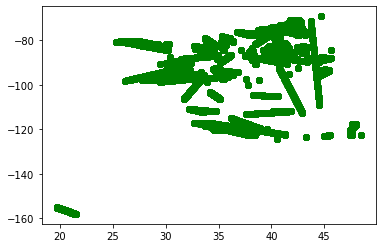

In [15]:
plt.scatter(latyes,longyes,c="g")
plt.show()

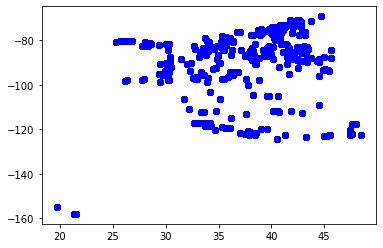

In [16]:
plt.scatter(latnot,longnot,c="b")
plt.show()

In [17]:
df0.columns

Index(['Unnamed: 0', 'index', 'lat', 'long', 'unix_time', 'amt', 'trans_age',
       'trans_year', 'trans_month', 'trans_day', 'state_pop', 'gender_0',
       'gender_1', 'state_0', 'state_1', 'state_2', 'state_3', 'state_4',
       'state_5', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5',
       'job_6', 'job_7', 'job_8', 'category_0', 'category_1', 'category_2',
       'category_3', 'merchant_0', 'merchant_1', 'merchant_2', 'merchant_3',
       'merchant_4', 'merchant_5', 'merchant_6', 'merchant_7', 'merchant_8',
       'merchant_9', 'is_fraud'],
      dtype='object')

In [18]:
latnot0=df0[df0["is_fraud"]==0].lat.tolist()
longnot0=df0[df0["is_fraud"]==0].long.tolist()
latyes0=df0[df0["is_fraud"]==1].lat.tolist()
longyes0=df0[df0["is_fraud"]==1].long.tolist()

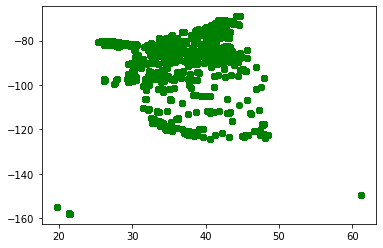

In [19]:
plt.scatter(latyes0,longyes0,c="g")
plt.show()

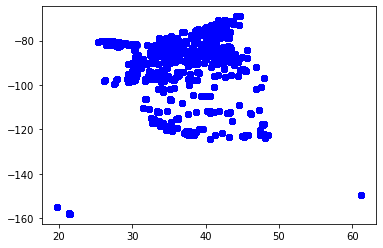

In [20]:
plt.scatter(latnot0,longnot0,c="b")
plt.show()

In [21]:
m0=df[(df["merchant_0"]==1) & (df["is_fraud"]==1)].merchant_0.tolist()
m1=df[(df["merchant_1"]==1) & (df["is_fraud"]==1)].merchant_1.tolist()
m2=df[(df["merchant_2"]==1) & (df["is_fraud"]==1)].merchant_2.tolist()
m3=df[(df["merchant_3"]==1) & (df["is_fraud"]==1)].merchant_3.tolist()
m4=df[(df["merchant_4"]==1) & (df["is_fraud"]==1)].merchant_4.tolist()
m5=df[(df["merchant_5"]==1) & (df["is_fraud"]==1)].merchant_5.tolist()
m6=df[(df["merchant_6"]==1) & (df["is_fraud"]==1)].merchant_6.tolist()
m7=df[(df["merchant_7"]==1) & (df["is_fraud"]==1)].merchant_7.tolist()
m8=df[(df["merchant_8"]==1) & (df["is_fraud"]==1)].merchant_8.tolist()
m9=df[(df["merchant_9"]==1) & (df["is_fraud"]==1)].merchant_9.tolist()

In [22]:
m=[sum(m0),sum(m1),sum(m2),sum(m3),sum(m4),sum(m5),sum(m6),sum(m7),sum(m8),sum(m9)]

In [23]:
a=[]
for i in range(len(m)):
    for k in range(m[i]):
        a.append(i)

In [24]:
a[-1]

9

In [25]:
print(sum(m8),sum(m9))

342638 306943


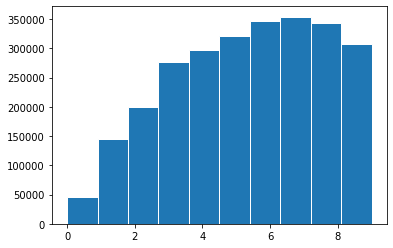

In [26]:
sumas=np.array(a)
fig, ax = plt.subplots()
ax.hist(sumas,edgecolor="w")
plt.show()

In [27]:
df.columns

Index(['index', 'lat', 'long', 'unix_time', 'amt', 'trans_age', 'trans_year',
       'trans_month', 'trans_day', 'state_pop', 'gender_0', 'gender_1',
       'state_0', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5',
       'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'category_0', 'category_1', 'category_2', 'category_3',
       'merchant_0', 'merchant_1', 'merchant_2', 'merchant_3', 'merchant_4',
       'merchant_5', 'merchant_6', 'merchant_7', 'merchant_8', 'merchant_9',
       'is_fraud'],
      dtype='object')

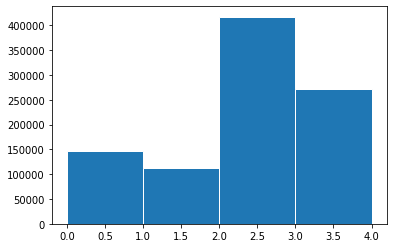

In [28]:
c0=df[(df["category_0"]==1) & (df["is_fraud"]==1)].category_0.tolist()
c1=df[(df["category_1"]==1) & (df["is_fraud"]==1)].category_1.tolist()
c2=df[(df["category_2"]==1) & (df["is_fraud"]==1)].category_2.tolist()
c3=df[(df["category_3"]==1) & (df["is_fraud"]==1)].category_3.tolist()

c=[sum(c0),sum(c1),sum(c2),sum(c3)]

b=[]
for i in range(len(c)):
    for k in range(c[i]):
        b.append(i)
        
sumas=np.array(b)
fig, ax = plt.subplots()
ax.hist(sumas,edgecolor="w",bins=[0,1,2,3,4])
plt.show()

In [29]:
df.columns

Index(['index', 'lat', 'long', 'unix_time', 'amt', 'trans_age', 'trans_year',
       'trans_month', 'trans_day', 'state_pop', 'gender_0', 'gender_1',
       'state_0', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5',
       'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'category_0', 'category_1', 'category_2', 'category_3',
       'merchant_0', 'merchant_1', 'merchant_2', 'merchant_3', 'merchant_4',
       'merchant_5', 'merchant_6', 'merchant_7', 'merchant_8', 'merchant_9',
       'is_fraud'],
      dtype='object')

[154962, 279138, 808924, 575594, 616279, 667429]


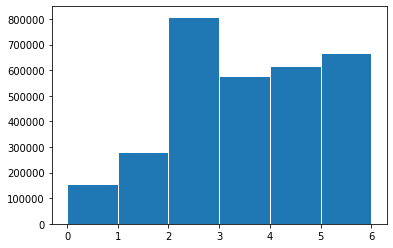

In [30]:
s0=df[(df["state_0"]==1) & (df["is_fraud"]==1)].state_0.tolist()
s1=df[(df["state_1"]==1) & (df["is_fraud"]==1)].state_1.tolist()
s2=df[(df["state_2"]==1) & (df["is_fraud"]==1)].state_2.tolist()
s3=df[(df["state_3"]==1) & (df["is_fraud"]==1)].state_3.tolist()
s4=df[(df["state_4"]==1) & (df["is_fraud"]==1)].state_4.tolist()
s5=df[(df["state_5"]==1) & (df["is_fraud"]==1)].state_5.tolist()


s=[sum(s0),sum(s1),sum(s2),sum(s3),sum(s4),sum(s5)]
print(s)
ss=[]
for i in range(len(s)):
    for k in range(s[i]):
        ss.append(i)
        
sumas=np.array(ss)
fig, ax = plt.subplots()
ax.hist(sumas,edgecolor="w",bins=[0,1,2,3,4,5,6])
plt.show()

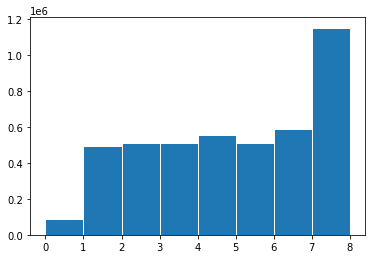

In [71]:
j0=df[(df["job_0"]==1) & (df["is_fraud"]==1)].job_0.tolist()
j1=df[(df["job_1"]==1) & (df["is_fraud"]==1)].job_1.tolist()
j2=df[(df["job_2"]==1) & (df["is_fraud"]==1)].job_2.tolist()
j3=df[(df["job_3"]==1) & (df["is_fraud"]==1)].job_3.tolist()
j4=df[(df["job_4"]==1) & (df["is_fraud"]==1)].job_4.tolist()
j5=df[(df["job_5"]==1) & (df["is_fraud"]==1)].job_5.tolist()
j6=df[(df["job_6"]==1) & (df["is_fraud"]==1)].job_6.tolist()
j7=df[(df["job_7"]==1) & (df["is_fraud"]==1)].job_7.tolist()
j8=df[(df["job_8"]==1) & (df["is_fraud"]==1)].job_8.tolist()


j=[sum(j0),sum(j1),sum(j2),sum(j3),sum(j4),sum(j5),sum(j6),sum(j7),sum(j8)]

jj=[]
for i in range(len(j)):
    for k in range(j[i]):
        jj.append(i)
        
sumas=np.array(jj)
fig, ax = plt.subplots()
ax.hist(sumas,edgecolor="w",bins=[0,1,2,3,4,5,6,7,8])
plt.show()

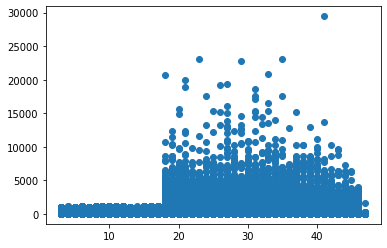

In [33]:
plt.scatter(df["trans_age"],df["amt"])
plt.show()

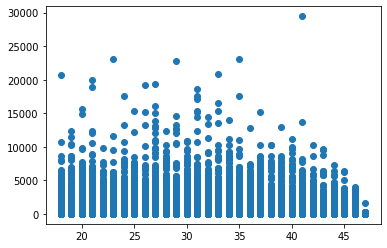

In [44]:
tragenot=df[df["is_fraud"]==0].trans_age.tolist()
amtnot=df[df["is_fraud"]==0].amt.tolist()
trageyes=df[df["is_fraud"]==1].trans_age.tolist()
amtyes=df[df["is_fraud"]==1].amt.tolist()
plt.scatter(tragenot,amtnot)
plt.show()

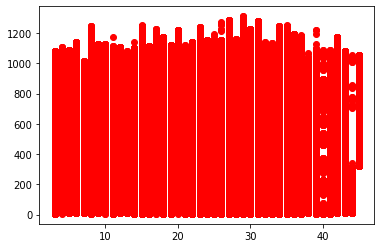

In [45]:
plt.scatter(trageyes,amtyes,c="red")
plt.show()

In [46]:
print(pd.DataFrame(trageyes).value_counts())

26    73072
18    68318
23    66284
29    64021
27    60426
20    55861
28    52459
22    50686
32    50653
21    48832
24    46171
31    45466
30    41267
16    39477
25    38810
35    37255
34    33481
33    33208
36    31541
17    28048
37    28003
19    26607
8     23511
41    21603
39    20707
10    20535
14    20063
15    18456
43    14387
11    13986
12    13241
38    13072
9     11984
13     9334
7      8488
6      8147
42     7961
3      4773
45     2954
4      2774
44     1498
5      1199
40     1088
dtype: int64


In [59]:
trageyesset=set(trageyes)
tragenotset=set(tragenot)
amtyesset=set(amtyes)
amtnotset=set(amtnot)
tragenotunique=[i for i in tragenotset if i not in trageyesset]
amtnotunique=[i for i in amtnotset if i not in amtyesset]
trageyesunique=[i for i in trageyesset if i not in tragenotset]
amtyesunique=[i for i in amtyesset if i not in amtnotset]
#print(tragenotunique)
#print(amtnotunique)


[46, 47]


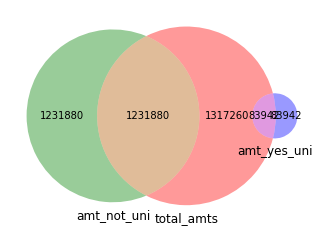

In [69]:
#print(len(amtnotunique),len(amtyesunique),(len(set(df["amt"]))))
#venn3(subsets = (1317260, 1231880,1231880,83942,83942,0,0), set_labels = ("total_amts","amt_not_uni","amt_yes_uni"))

In [65]:
print(len(trageyesunique),len(tragenotunique),len(set(df["trans_age"])))

15 2 45


In [15]:
test_set=pd.read_csv("/kaggle/input/cc-fraud-v4/cc_test.csv")
test_label=pd.read_csv("/kaggle/input/cc-fraud-v4/cc_test_label.csv")

In [16]:
test_set.drop(columns="Unnamed: 0",inplace=True)
test_label.drop(columns="Unnamed: 0",inplace=True)


In [17]:
df.drop(columns="is_fraud",inplace=True)

In [18]:
df.drop(columns="index",inplace=True)

In [22]:
clf1=DecisionTreeClassifier()
clf2=LogisticRegression()
clf3=RandomForestClassifier()


In [23]:
test_set.drop(columns="index",inplace=True)
(test_set.columns)

KeyError: "['index'] not found in axis"

In [24]:
clf3.fit(df,label)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [25]:
p1=clf3.predict(test_set)

In [26]:
print(pd.DataFrame(p1).value_counts(),test_label.value_counts())

0    1130553
1        439
dtype: int64 is_fraud
0           1130477
1               515
dtype: int64


In [27]:
print(classification_report(p1,test_label))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1130553
           1       0.85      1.00      0.92       439

    accuracy                           1.00   1130992
   macro avg       0.93      1.00      0.96   1130992
weighted avg       1.00      1.00      1.00   1130992



In [28]:
balanced_accuracy_score(p1,test_label)

0.9999663881304105